# Упражнение 1. Альтернативная реализация сортировки подсчетом

Изучите алгоритм сортировки подсчетом, представленный в разделе "устойчивый алгоритм" в [статье](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BF%D0%BE%D0%B4%D1%81%D1%87%D1%91%D1%82%D0%BE%D0%BC) из википедии. Реализуйте его на Python.

In [10]:
import random
L = [random.randint(0, 5) for _ in range(100)]

def StableCountingSort(L, k):
    
    # Счетчик числа чисел каждого вида
    C = [0] * k
    for elem in L:
        C[elem] += 1
    # Отсортированный массив
    B = [0] * len(L)
    
    for j in range(1, k):
        C[j] = C[j] + C[j - 1]
    
    for i in range(len(L)-1, -1, -1):
        C[L[i]] = C[L[i]] - 1
        B[C[L[i]]] = L[i]
    return B

In [12]:
print(L)
B = StableCountingSort(L, 6)
print(B)

[3, 1, 0, 5, 1, 5, 0, 5, 3, 1, 3, 5, 1, 3, 4, 5, 4, 4, 4, 5, 0, 1, 3, 5, 3, 0, 3, 2, 0, 0, 3, 5, 3, 3, 4, 1, 2, 3, 1, 2, 1, 5, 3, 1, 2, 5, 4, 3, 3, 1, 0, 5, 3, 0, 2, 0, 4, 2, 1, 0, 4, 0, 5, 2, 0, 3, 0, 1, 4, 2, 5, 5, 3, 5, 2, 5, 5, 5, 5, 4, 1, 5, 2, 1, 5, 3, 4, 2, 3, 1, 5, 0, 4, 5, 3, 4, 2, 2, 1, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


# Упражнение 2. Сортировка подсчетом без буфера

Модифицируйте алгоритм из упражнения 1 так, чтобы сортировка производилась без использования вспомогательного буфера для отсортированного массива.

In [ ]:
def StableCountingSort_no_Buffer(L, k):
    
    # Счетчик числа чисел каждого вида
    C = [0] * k
    for elem in L:
        C[elem] += 1
    
    for j in range(1, k):
        C[j] = C[j] + C[j - 1]
    
    for i in range(len(L)):
        last_i = len(L) - 1
        C[L[last_i]] = C[L[last_i]] - 1
        # Swop L[last_i] and L[C[L[last_i]]]
        
    return B

# Упражнение 3. Блочная сортировка для произвольного распределения 

Пусть элементы сортируемого массива $A$ распределены с плотностью вероятности $\rho(x)$. Как можно разбить область значений элементов массива на корзины для блочной сортировки? Реализуйте Ваш метод разбиения в виде функции `partition()`, которая будет принимать на вход три аргумента:

1. `N` - число блоков;

2. `bounds` - кортеж из двух элементов, содержащий левую и правую границы области значений элементов массива;

3. `rho` - функция вычисляющая плотность вероятности того, что элемент массива  принимает некоторое значение (функцция принимает одно вещественное число и возвращает одно вещественное число).

> Утверждение, что элементы распределены с плотностью вероятности $\rho(x)$, значит, что вероятность обнаружить элемент массива $e$ на отрезке $[x,~x + \Delta x]$  равна
$$P(e \in [x,~x + \Delta x]) = \int\limits_x^{x + \Delta x} \rho(x) dx$$
Считайте, что $\rho(x)$ не равна нулю только на отрезке `[bounds[0], bounds[1]]`

In [77]:
import scipy.integrate as integrate
import math
from scipy import optimize

# result = integrate.quad(lambda x: x, 0, 3)

# Плотность распределения
def rho(x):
    if x < 0 or x > 5:
        return 0
    return 1/5

# Функция распределения
def F(y):
    return integrate.quad(rho, 0, y)[0]

In [74]:
# Функция, находящая следующую точку разбиения области определения
# Принимает плотность распределения, начальную точку, вероятность
# Необходимо вернуть точку x_1, для которой вероятность попасть в интервал (x_0, x_1) равна p
def find_next(rho, x_0, p):
    # Функция, которую будем минимизировать
    f = lambda x: (F(x) - F(x_0) - p) ** 2
    return optimize.minimize(f, 0)

def partition(N, bounds, rho):
    borders = [bounds[0]]
    for i in range(N - 1):
        # Точка, в которой значение Функции Распределения увеличивается на 1/N
        b = find_next(rho, borders[-1], 1/N)
        borders.append(b['x'][0])
    borders.append(bounds[1])
    return borders

In [75]:
partition(5, (0, 5), rho)

[0,
 1.0000000002037268,
 1.999999955296519,
 2.9999998747371177,
 3.9999997476115885,
 5]

# Упражнение 4. Определение оптимального количества блоков (упражнение 3 из alg3)

Отсортируйте с помощью блочной сортировки список `L`. Определите оптимальное значение числа блоков для сортировки списка из $10^4$ элементов.

In [117]:
import timeit
import random
L = [random.uniform(0, 1) for _ in range(10**4)]

In [85]:
def insert_sort(A):
    
    for i in range(1, len(A)):
        # Первые i элементов уже отсортированы. Возьмем (i+1)-й элемент
        j = i
        while (j >= 1) and (A[j] < A[j - 1]):
            A[j - 1], A[j] = A[j], A[j - 1]
            j = j - 1


def bucket_sort(L, k):
    
    buckets = [[] for i in range(k)]
    
    # Разделение на корзины
    for elem in L:
        i_bucket = int(elem // (1 / k))
        buckets[i_bucket].append(elem)

    # Сортировка вставками каждой корзины
    for b in buckets:
        insert_sort(b)
        
    # Слияние отсортированных корзин
    index = 0
    for b in buckets:
        L[index: index + len(b)] = b
        index += len(b)

In [118]:
import time
N_buckets = [int(80*i) for i in range(1, 50)]
times = []

for k in N_buckets:
    start_time = time.time()
    L = [random.uniform(0, 1) for _ in range(10**4)]
    bucket_sort(L, k)
    finish_time = time.time()
    times.append(finish_time - start_time)

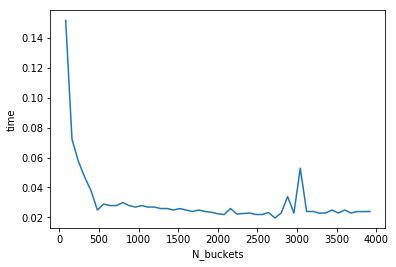

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(N_buckets, times);
plt.xlabel('N_buckets')
plt.ylabel('time');